上次我们已经提到了在你分析数据时最基础的工作 用 Pandas 打开数据文件， 不过我们并没有详细说这份打开的数据，它的格式是什么样。但了解我们要如何更改加工数据，我们必然还是要清楚这个在 Pandas 中的数据格式是什么。

简单来说，Pandas 支持最好的是一维和二维数据，一维数据就是一个序列，一条数据，而二维数据是我们生活中更常见的种类，基本上所有 Excel 数据， 都是二维数据，有横纵交替，用两个维度来定位这个数据。
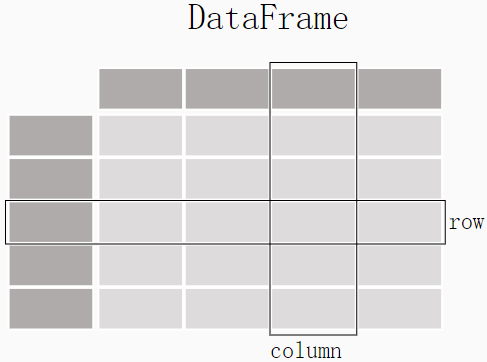

### 数据序列Series
一串 Python List 的形式你肯定不陌生，Pandas 中的 Series 的核心其实就是一串类似于 Python List 的序列。只是它要比 Python List 丰富很多， 有更多的功能属性。

In [1]:
import pandas as pd

l = [11,22,33]
s = pd.Series(l)
print("list:", l)
print("series:", s)

list: [11, 22, 33]
series: 0    11
1    22
2    33
dtype: int64


打印出来，对比很明显，Pandas Series 还帮我们额外维护了一份索引。有这个索引有啥意义呢？Python List 不也有一个隐藏的序号索引吗？ 其实啊，Pandas 之所以做这一种索引，目的并不是仅让你用 0123 这样的序号来检索数据，它还想让你可以用自己喜欢的索引来检索。看看下面的代码吧。

In [2]:
s = pd.Series(l, index=["a", "b", "c"])
s

a    11
b    22
c    33
dtype: int64

是不是打开了新世界！原来还能自定义索引。现在想想，你有没有发现，是不是只要是有索引形式的结构，都可以搞成 Series？比如下面这样

In [3]:
s = pd.Series({"a": 11, "b": 22, "c": 33})
s

a    11
b    22
c    33
dtype: int64

太神奇了吧，原来字典也可以变成一个序列！更神奇的还在后面的 DataFrame 呢，也可以用字典来创建 DataFrame。

既然 Python 的 List 可以用来创建 Series，那我想 Numpy 应该也可以吧，要不来试试。

In [4]:
import numpy as np

s = pd.Series(np.random.rand(3), index=["a", "b", "c"])

既然 Numpy 和 List 可以用来创建 Series，那 Series 能回退到 Numpy array 或者 List 吗? 我们试一试。

In [5]:
print("array:", s.to_numpy())
print("list:", s.values.tolist())

array: [0.57909291 0.25213573 0.57437554]
list: [0.5790929080723504, 0.25213572849587795, 0.5743755393942553]


还真是，他们真的能自由穿梭，这可大大减轻了我们在不同的数据形式中切换的成本。一维的 Series 都这么神奇，那二维的 DataFrame 岂不是要玩出花来。

### 数据表DataFrame
Pandas 首先支持的是序列数据和表格数据，因为这两种是如常生活中最常用的数据保存和编辑格式了，你见过有人去编辑一个 3 维数据吗？ 话说回来，如果你硬扯上 Excel 里面的不同 sheet，把 sheet 当成第三个维度，那也是成立的。sheet 这个我就先不说了，我们先看看用 Pandas 的 DataFrame 怎么维护一张数据表吧。

在上一节数据文件读取的教学中，你 load 到的数据，实际上就是一个 DataFrame， 举个最简单的例子。将一个二维数组变成 Pandas 的 DataFrame。

In [6]:
df = pd.DataFrame([
  [1,2],
  [3,4]
])
df

,0,1
0,1,2
1,3,4


你看看，它创建出来的 df，在真实数据外圈，还包上了一层其他的数据，比如 0 1， 这是什么呢？其实这是 DataFrame 中，用来索引行列的序号， 外圈的横竖都是 0 1 代表着每个维度上，都有第 0 位和第 1 位。如果我要按位置来选取一下其中的值，我可以这么干。

In [7]:
# 第 0 行，第 1 列
# 或 第一个维度中的第 0 号，第二个维度中的第 1 号
df.at[0, 1]  

2

Pandas 中还有很多方式来选取和改变数据值，请按捺一下激动的小心情， 我们将在下节内容中具体介绍。

上面我们见识到了直接用一个二维列表来创建 DataFrame，但是自动创建的索引序号并不是很可读。我们还能将这些序号换成人类更好理解的文字标签信息。

In [8]:
df = pd.DataFrame({"col1": [1,3], "col2": [2, 4]})
df

,col1,col2
0,1,2
1,3,4


可以从结果看出，其实字典中的 key 会被当成是数据中的 column，而 value 会被当做是 row，这个非常符合你在 Excel 中的使用习惯。 因为往往随着数据量变大，你用鼠标滚轮滚动查看不同数据的时候，天然的比较喜欢上下查看不同的数据样本，而不是左右查看，所以**一般都是左右记的是数据标签（特征）， 上下排列的是不同数据样本。**

见识了字典变 DataFrame，其实 Series 也是可以组合变成 DataFrame 的，而且这也非常符合常理， 如果我从 DataFrame 中取出一个 Column， 这不就变成了一条 Series 了吗？

In [9]:
print(df["col1"], "\n")
print("取出来之后的 type：", type(df["col1"]))

0    1
1    3
Name: col1, dtype: int64 

取出来之后的 type： <class 'pandas.core.series.Series'>


那么将两个 Series 拼接起来呢？

In [10]:
df = pd.DataFrame({"col1": pd.Series([1,3]), "col2": pd.Series([2, 4])})
df

,col1,col2
0,1,2
1,3,4


前面 Series 说过，我们是可以为它构建特殊索引的，现在来看看 Series 和 DataFrame 构建索引的方式：

In [11]:
s = pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"])
df = pd.DataFrame({"col1": [1,3], "col2": [2, 4]}, index=["a", "b"])
print(s, "\n")
print(df)

a    1.0
b    2.0
c    3.0
dtype: float64 

   col1  col2
a     1     2
b     3     4


既然 DataFrame 的 Column 和 Index 这么有意思，十有八九，你会想取出来用一用这些 Column 和 Index，比如你数据比较大的时候，想初步看看这份数据涉及了多少特征， 数据的 index 有多少种的时候，你可以直接获取到这些信息。

In [12]:
print(df.index, "\n")
print(df.columns)

Index(['a', 'b'], dtype='object') 

Index(['col1', 'col2'], dtype='object')


还有更有意思的，如果写前端的朋友，你们时常会遇到 json 形式的数据，比如可以像下面这样处理。

In [13]:
my_json_data = [
  {"age": 12, "height": 111},
  {"age": 13, "height": 123}
]
pd.DataFrame(my_json_data, index=["jack", "rose"])

,age,height
jack,12,111
rose,13,123


现在有了 Pandas 中的 DataFrame，我们在想转化成 Numpy，怎么搞？ 如果你刚刚认真跑 Series 的案例，你就会知道可以用下面的方法。

In [14]:
df = pd.DataFrame({"col1": [1,3], "col2": [2, 4]}, index=["a", "b"])
df.to_numpy()

array([[1, 2],
       [3, 4]], dtype=int64)

Pandas 真的用心良苦，为我们广大数据同胞提供了这么多这么丰富的接口。学会这样观看数据，我们在分析和处理数据的时候就更有把握了。

### 总结
Pandas 中，为了我们提供了日常最常用的数据存储方式，分别是 Series 的一维数据，和 DataFrame 的二维数据，在机器学习中，我们常会接触到 3 维甚至是更高维度， 但是在分析数据的时候，特别是，要结合 Excel 来分析数据的时候，二维数据才是最常用的。

了解 Pandas 的 Series，DataFrame 如何构建，和这两种数据类型的差别，我们再来探索更有趣的数据选取教学。